In [ ]:
import pandas as pd

HISTORICAL_URL = "https://www.openintro.org/book/statdata/ames.csv"
df = pd.read_csv(HISTORICAL_URL)
df.head()

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,...,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,...,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,...,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
df.shape

(2930, 82)

In [ ]:
df.info()
#Input
#43 variabili categoriche
#36 numeriche
#2 irrilevanti 
#Output: 1 variabile numerica

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS.SubClass      2930 non-null   int64  
 3   MS.Zoning        2930 non-null   object 
 4   Lot.Frontage     2440 non-null   float64
 5   Lot.Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot.Shape        2930 non-null   object 
 9   Land.Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot.Config       2930 non-null   object 
 12  Land.Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition.1      2930 non-null   object 
 15  Condition.2      2930 non-null   object 
 16  Bldg.Type        2930 non-null   object 
 17  House.Style   

In [ ]:
from sklearn.model_selection import train_test_split
# Drop PID, order

df.drop(['Order','PID'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(df[df.columns.difference(['SalePrice'])], df['SalePrice'], test_size=0.50, random_state=42)

In [ ]:
pd.options.display.float_format = "{:,.4f}".format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
print(X_train.describe().transpose())

                     count        mean        std        min        25%  \
Bedroom.AbvGr   1,465.0000 2.8526      0.8323     0.0000     2.0000       
Bsmt.Full.Bath  1,464.0000 0.4399      0.5363     0.0000     0.0000       
Bsmt.Half.Bath  1,464.0000 0.0587      0.2352     0.0000     0.0000       
Bsmt.Unf.SF     1,464.0000 554.4918    436.9893   0.0000     216.0000     
BsmtFin.SF.1    1,464.0000 454.3197    446.6815   0.0000     0.0000       
BsmtFin.SF.2    1,464.0000 45.2158     160.1193   0.0000     0.0000       
Enclosed.Porch  1,465.0000 25.2717     64.1646    0.0000     0.0000       
Fireplaces      1,465.0000 0.5939      0.6557     0.0000     0.0000       
Full.Bath       1,465.0000 1.5720      0.5560     0.0000     1.0000       
Garage.Area     1,464.0000 472.2411    215.5755   0.0000     319.0000     
Garage.Cars     1,464.0000 1.7650      0.7654     0.0000     1.0000       
Garage.Yr.Blt   1,381.0000 1,977.8320  24.6653    1,900.0000 1,961.0000   
Gr.Liv.Area     1,465.000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
X_train.describe(include=['O']).transpose()

,count,unique,top,freq
Alley,106,2,Grvl,66
Bldg.Type,1465,5,1Fam,1207
Bsmt.Cond,1433,5,TA,1315
Bsmt.Exposure,1431,4,No,975
Bsmt.Qual,1433,4,TA,662
BsmtFin.Type.1,1433,6,GLQ,439
BsmtFin.Type.2,1433,6,Unf,1267
Central.Air,1465,2,Y,1366
Condition.1,1465,9,Norm,1268
Condition.2,1465,6,Norm,1451


In [ ]:
df_train_null = pd.DataFrame()
df_train_null['missing'] = X_train.isnull().sum()[X_train.isnull().sum() > 0].sort_values(ascending=False)
print(df_train_null)

                missing
Pool.QC         1462   
Misc.Feature    1411   
Alley           1359   
Fence           1180   
Fireplace.Qu    726    
Lot.Frontage    265    
Garage.Yr.Blt   84     
Garage.Qual     84     
Garage.Finish   84     
Garage.Cond     84     
Garage.Type     83     
Bsmt.Exposure   34     
Bsmt.Cond       32     
Bsmt.Qual       32     
BsmtFin.Type.1  32     
BsmtFin.Type.2  32     
Mas.Vnr.Type    12     
Mas.Vnr.Area    12     
BsmtFin.SF.2    1      
BsmtFin.SF.1    1      
Bsmt.Unf.SF     1      
Bsmt.Half.Bath  1      
Bsmt.Full.Bath  1      
Garage.Area     1      
Garage.Cars     1      
Total.Bsmt.SF   1      


In [ ]:
X_train.drop(['Pool.QC', 'Fireplace.Qu', 'Fence', 
               'Alley', 'Misc.Feature'], axis=1, inplace=True)

#Questa operazione deve essere fatta sul test set!!!!

In [ ]:
y_train.describe().transpose()

count   1,465.0000  
mean    179,697.8334
std     77,938.5052 
min     12,789.0000 
25%     129,900.0000
50%     160,500.0000
75%     210,250.0000
max     755,000.0000
Name: SalePrice, dtype: float64

In [ ]:
DPI = 300

#Valori in cm
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

#impostazione della dimesione dei font
#plt.rcParams.update({'font.size': 8})

#np.random.seed(10)

#import e gloabals e funzioni
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import Generator, PCG64
%matplotlib inline

In [ ]:
#La stessa trasformazione deve essere applicata al test set
from sklearn.preprocessing import PowerTransformer

yj  = PowerTransformer(
    method = 'yeo-johnson', standardize=True).fit(y_train.values.reshape(-1,1))
y_train_tr = yj.transform(y_train.values.reshape(-1,1))

print(yj.lambdas_)
#E' un logaritmo


from scipy.stats import skew, kurtosis
print(skew(y_train),"   ", kurtosis(y_train))
print(skew(y_train_tr)[0]," ", kurtosis(y_train_tr)[0])

[0.01747728]
1.7843166037434472     5.407166800175554
0.004021865830893869   1.7064709865433034


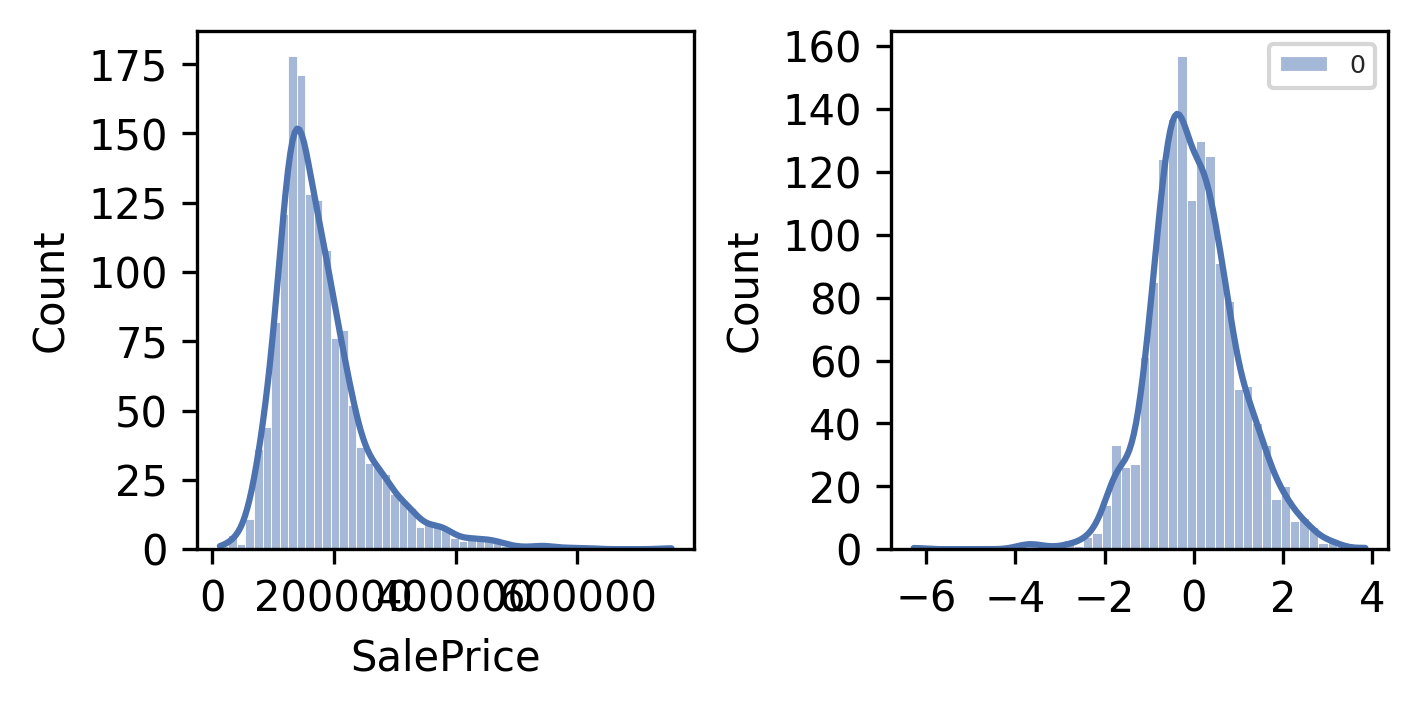

In [ ]:
import seaborn as sns


fs=(cm2inch(12,6))
fig, ax = plt.subplots(nrows = 1, ncols= 2, figsize = fs, tight_layout = True, dpi = DPI)
sns.set()
sns.set_theme(style="white", font_scale=0.55)
np.random.seed(0)
sns.histplot(data=y_train, kde=True, ax=ax[0])
sns.histplot(data=y_train_tr, kde=True, ax=ax[1])
fig.show()
fig.savefig('8.1.png')

In [ ]:
#Valori numerici
numerical_columns = X_train.select_dtypes(exclude=['object']).columns.tolist()
print(len(numerical_columns))
print(numerical_columns)



36
['Bedroom.AbvGr', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Bsmt.Unf.SF', 'BsmtFin.SF.1', 'BsmtFin.SF.2', 'Enclosed.Porch', 'Fireplaces', 'Full.Bath', 'Garage.Area', 'Garage.Cars', 'Garage.Yr.Blt', 'Gr.Liv.Area', 'Half.Bath', 'Kitchen.AbvGr', 'Lot.Area', 'Lot.Frontage', 'Low.Qual.Fin.SF', 'MS.SubClass', 'Mas.Vnr.Area', 'Misc.Val', 'Mo.Sold', 'Open.Porch.SF', 'Overall.Cond', 'Overall.Qual', 'Pool.Area', 'Screen.Porch', 'TotRms.AbvGrd', 'Total.Bsmt.SF', 'Wood.Deck.SF', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'X3Ssn.Porch', 'Year.Built', 'Year.Remod.Add', 'Yr.Sold']


In [ ]:
X_train_numerical = X_train[numerical_columns]
X_train_numerical = X_train_numerical.apply(lambda x: x.fillna(x.median()), axis=0)
print(X_train_numerical.info())
print(type(y_train_tr))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1465 entries, 925 to 860
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bedroom.AbvGr    1465 non-null   int64  
 1   Bsmt.Full.Bath   1465 non-null   float64
 2   Bsmt.Half.Bath   1465 non-null   float64
 3   Bsmt.Unf.SF      1465 non-null   float64
 4   BsmtFin.SF.1     1465 non-null   float64
 5   BsmtFin.SF.2     1465 non-null   float64
 6   Enclosed.Porch   1465 non-null   int64  
 7   Fireplaces       1465 non-null   int64  
 8   Full.Bath        1465 non-null   int64  
 9   Garage.Area      1465 non-null   float64
 10  Garage.Cars      1465 non-null   float64
 11  Garage.Yr.Blt    1465 non-null   float64
 12  Gr.Liv.Area      1465 non-null   int64  
 13  Half.Bath        1465 non-null   int64  
 14  Kitchen.AbvGr    1465 non-null   int64  
 15  Lot.Area         1465 non-null   int64  
 16  Lot.Frontage     1465 non-null   float64
 17  Low.Qual.Fin.

In [ ]:
#Baseline e scelta della funzion edi errore e metrica di valutazione (scarto quadratico medio)
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train_numerical)
X_scaled = scaler.transform(X_train_numerical)
parameters = {'alpha':[0.001, 0.01, 0.1]}
model = Lasso()
clf = GridSearchCV(model, parameters, cv = 10, scoring='neg_mean_squared_error')
clf.fit(X_scaled, y_train_tr)

results_df = pd.DataFrame(clf.cv_results_)
results_df = results_df.sort_values(by=['rank_test_score'])
print(results_df[['params', 'rank_test_score', 'mean_test_score', 'std_test_score']])

             params  rank_test_score  mean_test_score  std_test_score
1  {'alpha': 0.01}   1               -0.1450          0.0851         
0  {'alpha': 0.001}  2               -0.1498          0.0887         
2  {'alpha': 0.1}    3               -0.1900          0.0828         


In [ ]:
#La stessa trasformazione deve essere applicata al test set
from sklearn.preprocessing import PowerTransformer

X_scaler  = PowerTransformer(method = 'yeo-johnson', standardize=True).fit(X_train_numerical.values)
X_train_numerical_tr = X_scaler.transform(X_train_numerical.values)

print(X_scaler.lambdas_)
print(X_train_numerical_tr.shape)

#from sklearn.preprocessing import StandardScaler
#X_scaler = StandardScaler()
#X_train_numerical_tr = X_scaler.fit_transform(X_train_numerical)

[ 6.98178646e-01 -1.44831977e+00 -2.45761252e+01  4.63554421e-01
  2.51946784e-01 -1.55010721e+00 -1.16818919e+00 -6.06054264e-01
  3.18175791e-01  8.05849879e-01  1.22260329e+00  2.84436712e+01
 -2.30564165e-02 -2.30948639e+00 -1.81891202e+00  1.10964803e-01
  6.62100359e-01 -1.64240053e+01 -2.09981604e-01 -2.45907908e-01
 -4.11067053e+00  7.51254311e-01  9.79830723e-03  4.38154094e-01
  6.47882887e-01 -8.17817445e+01 -2.35074191e+00 -5.69708163e-02
  7.57683797e-01 -6.44907551e-02 -3.70344291e-02 -1.31739299e-01
 -1.39374620e+01  2.21777295e+01  3.67530441e+01 -2.58676010e+00]
(1465, 36)


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


(1465, 37)


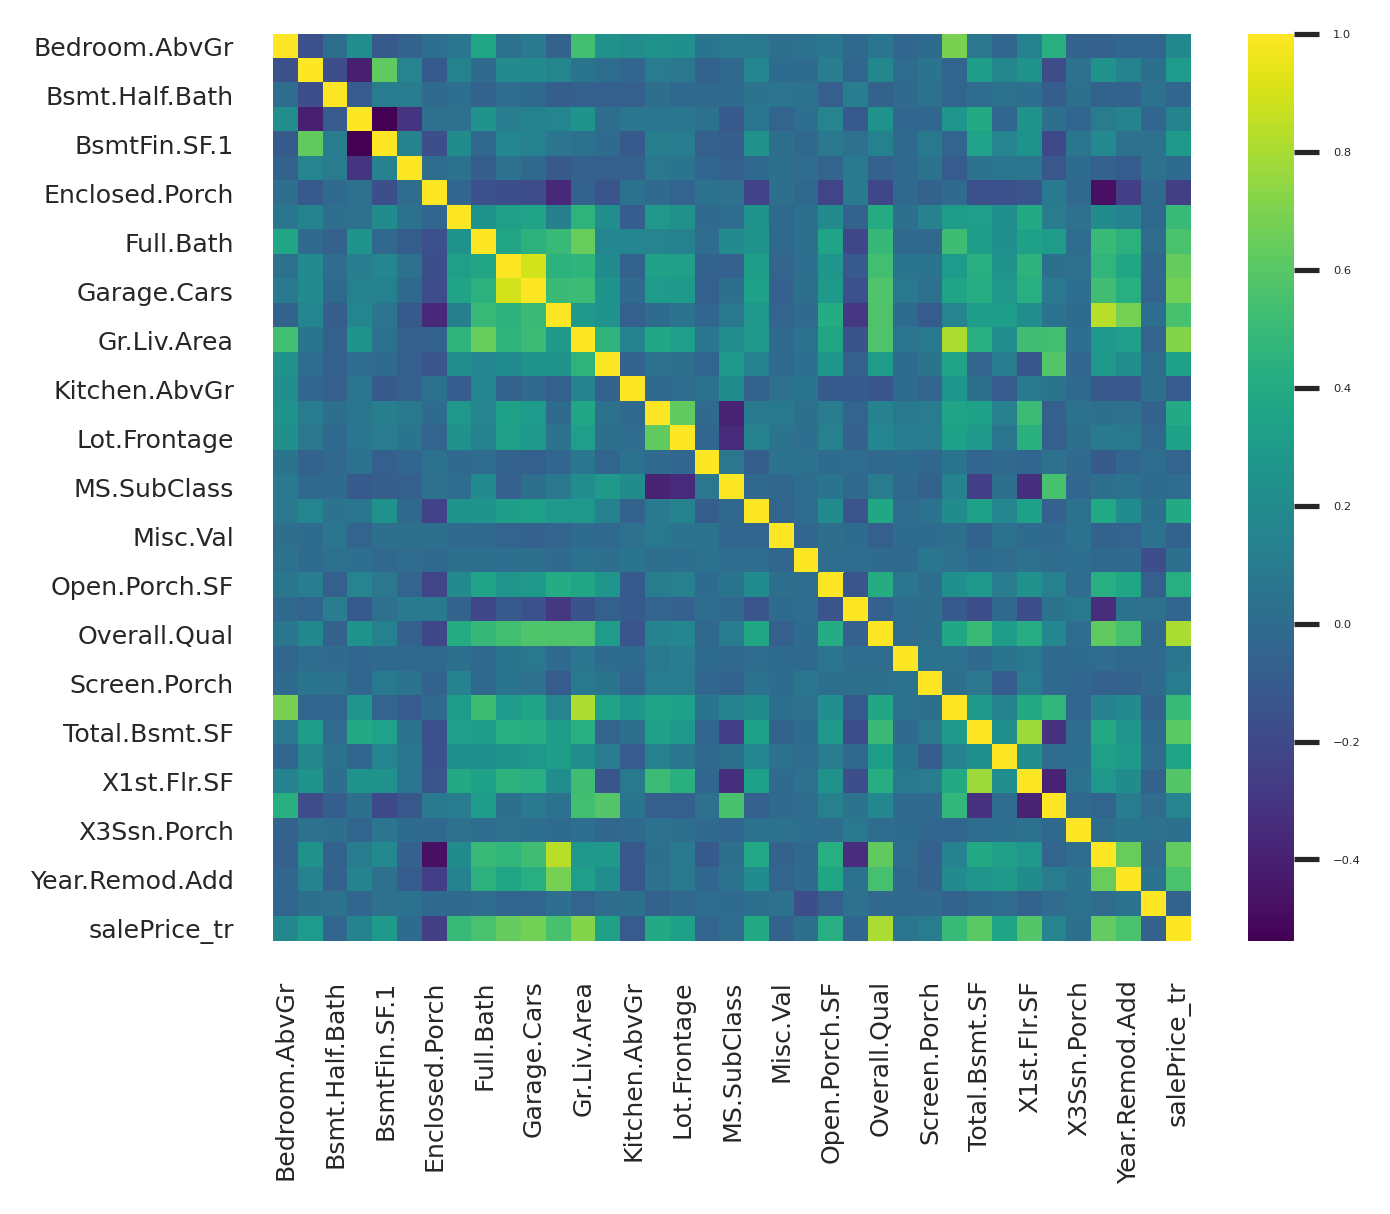

In [ ]:
df_X_train_numerical_tr = pd.DataFrame(X_train_numerical_tr, columns=numerical_columns)
df_y_train_tr = pd.DataFrame(y_train_tr.reshape(-1,1), columns=['salePrice_tr'])
corr_data = pd.concat([df_X_train_numerical_tr, df_y_train_tr], axis = 1)

print(corr_data.shape)

fs=(cm2inch(12,10))
fig, ax = plt.subplots(1, 1, figsize = fs, tight_layout = True, dpi = DPI)
sns.set(style="ticks", color_codes=True, font_scale = 0.25)
sns.heatmap(corr_data.corr(), cmap='viridis', fmt=".2f")
fig.show()
fig.savefig('8.2.png')

In [ ]:
#Baseline e scelta della funzion edi errore e metrica di valutazione (scarto quadratico medio)
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


parameters = {'alpha':[0.001, 0.005, 0.01, 0.05, 0.1]}
model = Lasso()
clf = GridSearchCV(model, parameters, cv = 5, scoring='neg_mean_squared_error')
clf.fit(X_train_numerical_tr, y_train_tr)

results_df = pd.DataFrame(clf.cv_results_)
results_df = results_df.sort_values(by=['rank_test_score'])
print(results_df[['params', 'rank_test_score', 'mean_test_score', 'std_test_score']])

#sklearn osserva i valori massimi e non minimi, per cui l'errore è negativizzato
#ossia l'errore quadratico medio della baseline è pari 0.122 con lambda pari a 0.01
#ovviamente l'errore è trasformato, per ottenere il valore reale occorre riconvertire il valore 0.122

             params  rank_test_score  mean_test_score  std_test_score
2  {'alpha': 0.01}   1               -0.1220          0.0400         
1  {'alpha': 0.005}  2               -0.1223          0.0394         
0  {'alpha': 0.001}  3               -0.1230          0.0393         
3  {'alpha': 0.05}   4               -0.1364          0.0435         
4  {'alpha': 0.1}    5               -0.1713          0.0454         


In [ ]:
from sklearn.metrics import mean_squared_error as mse

best_model = clf.best_estimator_
y_hat_tr = best_model.predict(X_train_numerical_tr)
#inverse transform
y_hat = yj.inverse_transform(y_hat_tr.reshape(-1,1))

print(mse(y_hat, y_train, squared=False))

#Test: utlizzare le meidane del training set 
d = {}
for col in numerical_columns:
  med = X_train[[col]].median().values[0]
  d[col]=med

X_test_filled = X_test.fillna(value=d)
X_test_numerical = X_test_filled[numerical_columns]
y_test_hat_tr = best_model.predict(X_scaler.transform(X_test_numerical))
y_test_hat = yj.inverse_transform(y_test_hat_tr.reshape(-1,1))
print(mse((y_test_hat), (y_test), squared=False))

29312.81900322268
34961.671686799426


In [ ]:
#Un errore medio di circa 26000. Questo è un primo modello veloce, non abbiamo verificato la presenza di outliers 
#ed abbiamo utilizzato una semplice imputazione basata sul valore mediano, utlizzando
# solo i valori numerici a disposizione

In [ ]:
print(df_X_train_numerical_tr.columns)
df_corr = df_X_train_numerical_tr.corrwith(df_y_train_tr['salePrice_tr']).abs().sort_values(ascending=False)
print(df_corr)

Index(['Bedroom.AbvGr', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Bsmt.Unf.SF',
       'BsmtFin.SF.1', 'BsmtFin.SF.2', 'Enclosed.Porch', 'Fireplaces',
       'Full.Bath', 'Garage.Area', 'Garage.Cars', 'Garage.Yr.Blt',
       'Gr.Liv.Area', 'Half.Bath', 'Kitchen.AbvGr', 'Lot.Area', 'Lot.Frontage',
       'Low.Qual.Fin.SF', 'MS.SubClass', 'Mas.Vnr.Area', 'Misc.Val', 'Mo.Sold',
       'Open.Porch.SF', 'Overall.Cond', 'Overall.Qual', 'Pool.Area',
       'Screen.Porch', 'TotRms.AbvGrd', 'Total.Bsmt.SF', 'Wood.Deck.SF',
       'X1st.Flr.SF', 'X2nd.Flr.SF', 'X3Ssn.Porch', 'Year.Built',
       'Year.Remod.Add', 'Yr.Sold'],
      dtype='object')
Overall.Qual      0.8051
Gr.Liv.Area       0.7136
Garage.Cars       0.6724
Garage.Area       0.6395
Year.Built        0.6304
Total.Bsmt.SF     0.6084
X1st.Flr.SF       0.5912
Year.Remod.Add    0.5608
Full.Bath         0.5575
Garage.Yr.Blt     0.5546
Fireplaces        0.5010
TotRms.AbvGrd     0.4967
Open.Porch.SF     0.4246
Mas.Vnr.Area      0.3962
Lot.Area  

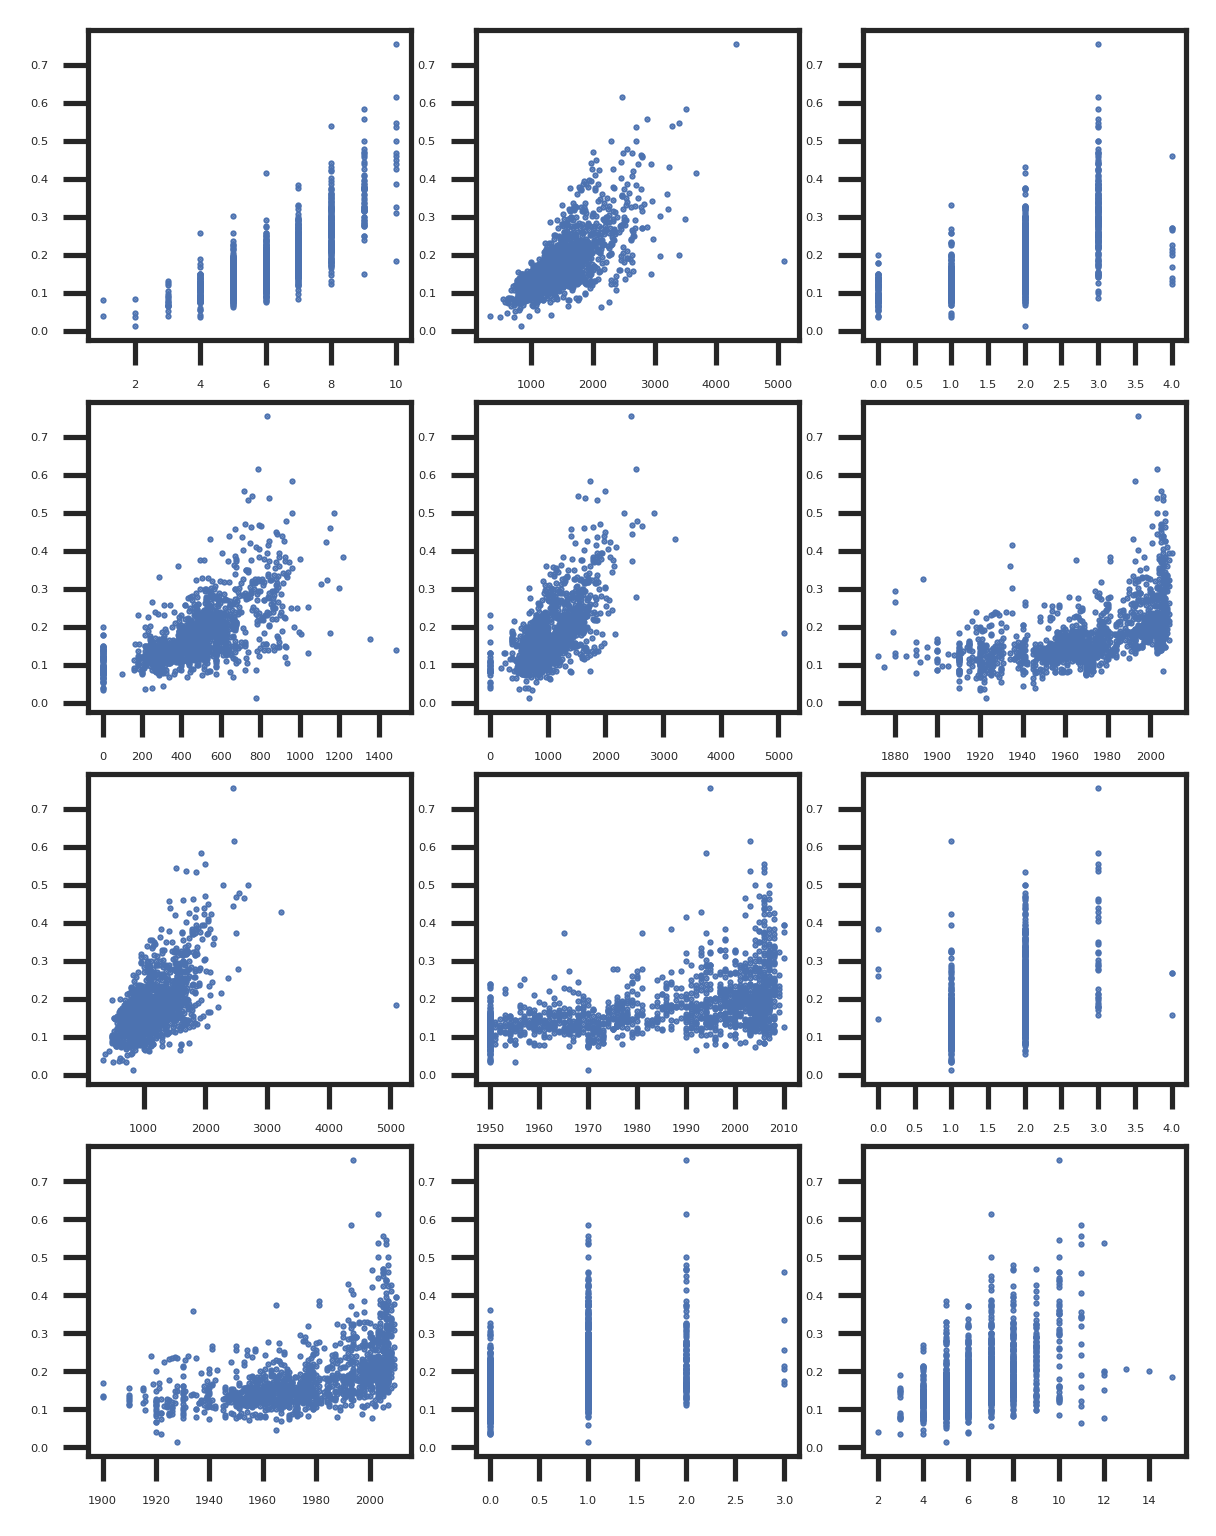

In [ ]:
fs=(cm2inch(12,16))
fig, ax=plt.subplots(nrows = 4, ncols= 3 , figsize=fs, dpi=DPI)

#Scatter plot di correlazione
i= 0
j = 0
for col in ['Overall.Qual', 'Gr.Liv.Area', 'Garage.Cars', 'Garage.Area','Total.Bsmt.SF', 'Year.Built', 'X1st.Flr.SF',
            'Year.Remod.Add', 'Full.Bath', 'Garage.Yr.Blt', 'Fireplaces', 'TotRms.AbvGrd']:
            #x = corr_data[[col]]
            #y = corr_data[['salePrice_tr']]
            x = X_train[[col]]
            y = y_train/1000000                        
            ax[j, i].plot(x, y, "b.", markersize = 1)           
            i = i + 1
            if i > 2: 
              i = 0
              j = j + 1

fig.savefig('8.3.png')
plt.show()

In [ ]:
#analizziamo i dati
#Garage Cars e garage area hanno la stessa informazione

print(X_train.loc[X_train['Total.Bsmt.SF']> 5000].index.values)
print(X_train.loc[[2180]].T)
#print(X_train.info())
#E' stata vendita prima di essere stata costruita?

print(X_train[X_train['Yr.Sold'] < X_train['Year.Built']].index.values)

#Indagando ancora si scopre che...inserire

[2180]
                 2180
Bedroom.AbvGr   2    
Bldg.Type       1Fam 
Bsmt.Cond       TA   
Bsmt.Exposure   Gd   
Bsmt.Full.Bath 1.0000
...               ...
X2nd.Flr.SF     0    
X3Ssn.Porch     0    
Year.Built      2008 
Year.Remod.Add  2009 
Yr.Sold         2007 

[74 rows x 1 columns]
[2180]


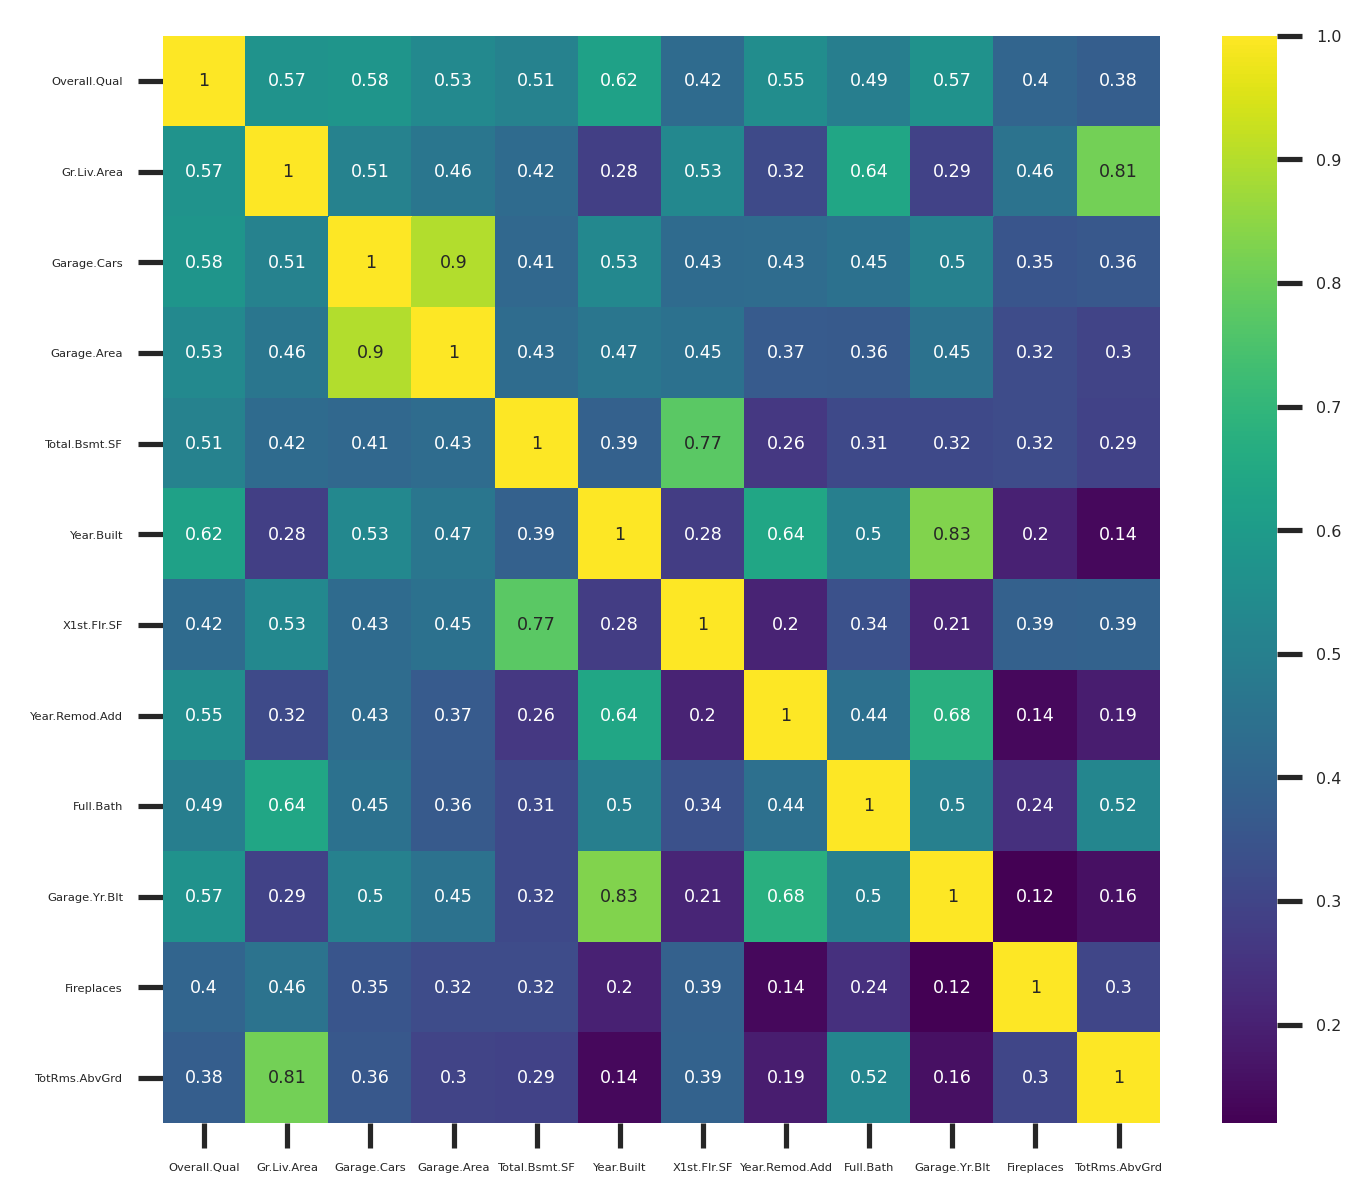

In [ ]:
#Eseguiamo una nuova heat map utilizzando solo le 12 componenti più correlate
cols = ['Overall.Qual', 'Gr.Liv.Area', 'Garage.Cars', 'Garage.Area','Total.Bsmt.SF', 'Year.Built', 'X1st.Flr.SF',
            'Year.Remod.Add', 'Full.Bath', 'Garage.Yr.Blt', 'Fireplaces', 'TotRms.AbvGrd']
corr_data2 = corr_data[cols]

fs=(cm2inch(12,10))
fig, ax = plt.subplots(1, 1, figsize = fs, tight_layout = True, dpi = DPI)
sns.set(style="ticks", color_codes=True, font_scale = 0.35)
sns.heatmap(corr_data2.corr(), cmap='viridis', annot=True)
fig.show()
fig.savefig('8.4.png')


In [ ]:
#Garage Area e garage cars rappresentano un informazione simile, possiamo eliminare una
# similmente year.built e garage.year.built
#Gr.Liv.Area e totrms.AbvGrd
#total.bsmt.Sf e X1st.Flr.SF

#Eliminiamo le variabili collineari ed utlizziamo il solo set con poche componenti.
#Inoltre dobbiamo togliere ricalcolare le trasformazioni senza l'outlier

#Eliminiamo l'outlier
X_train_c = X_train.drop([2180])
y_train_c = y_train.drop([2180])

In [ ]:
#cols_2 = ['Overall.Qual', 'Gr.Liv.Area', 'Garage.Area','Total.Bsmt.SF', 'Year.Built', 
          #'Year.Remod.Add', 'Full.Bath', 'Garage.Yr.Blt', 'Fireplaces']

#cols_2 = cols

cols_2 = numerical_columns

In [ ]:
#La stessa trasformazione deve essere applicata al test set
from sklearn.preprocessing import PowerTransformer

yj_c  = PowerTransformer(method = 'yeo-johnson', standardize=True).fit(y_train_c.values.reshape(-1,1))
y_train_tr_c = yj_c.transform(y_train_c.values.reshape(-1,1))

print(yj.lambdas_)
#E' un logaritmo

from scipy.stats import skew, kurtosis
print(skew(y_train_c),"   ", kurtosis(y_train_c))
print(skew(y_train_tr_c)[0]," ", kurtosis(y_train_tr_c)[0])

[0.01747728]
1.7838217753140058     5.401720356975888
0.003959923302052391   1.7050154808609639


In [ ]:
X_train_numerical_c = X_train_c[cols_2]
X_train_numerical_c = X_train_numerical_c.apply(lambda x: x.fillna(x.median()), axis=0)

print(X_train_numerical_c.shape)
#La stessa trasformazione deve essere applicata al test set
from sklearn.preprocessing import PowerTransformer

X_scaler_c  = PowerTransformer(method = 'yeo-johnson', standardize=True).fit(X_train_numerical_c.values)
X_train_numerical_tr_c = X_scaler_c.transform(X_train_numerical_c.values)

print(X_scaler_c.lambdas_)
print(X_train_numerical_tr_c.shape)

(1464, 36)
[ 6.99461172e-01 -1.45458001e+00 -2.48482863e+01  4.63341854e-01
  2.53092957e-01 -1.54903042e+00 -1.16729927e+00 -6.08106895e-01
  3.15270414e-01  8.08162217e-01  1.22280430e+00  2.84226212e+01
  1.03274673e-02 -2.31751946e+00 -1.81881169e+00 -8.30655712e+00
  6.66635225e-01 -1.64127944e+01 -2.08841236e-01 -2.46863388e-01
 -4.22329784e+00  7.50544464e-01  1.00014943e-02  4.38966757e-01
  6.57210971e-01 -8.17259211e+01 -2.34913574e+00 -1.93943820e-02
  7.99004792e-01 -6.51171514e-02  3.50654564e-02 -1.31201209e-01
 -1.39279489e+01  2.21554745e+01  3.67016306e+01 -8.30655712e+00]
(1464, 36)


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

quad_features = PolynomialFeatures(degree=2, include_bias=False)
x_quad = quad_features.fit_transform(X_train_numerical_tr_c)

parameters = {'alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.25]}
model = Lasso()
clf = GridSearchCV(model, parameters, cv = 5, scoring='neg_mean_squared_error')
clf.fit(x_quad, y_train_tr_c)

results_df = pd.DataFrame(clf.cv_results_)
results_df = results_df.sort_values(by=['rank_test_score'])
print(results_df[['params', 'rank_test_score', 'mean_test_score', 'std_test_score']])

             params  rank_test_score  mean_test_score  std_test_score
3  {'alpha': 0.05}   1               -0.1618          0.0692         
2  {'alpha': 0.01}   2               -0.1663          0.1087         
0  {'alpha': 0.001}  3               -0.1762          0.0647         
1  {'alpha': 0.005}  4               -0.1823          0.1311         
4  {'alpha': 0.1}    5               -0.1928          0.0620         
5  {'alpha': 0.25}   6               -0.2878          0.0582         


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':[0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.25]}
model = Lasso()
clf = GridSearchCV(model, parameters, cv = 5, scoring='neg_mean_squared_error')
clf.fit(X_train_numerical_tr_c, y_train_tr_c)

results_df = pd.DataFrame(clf.cv_results_)
results_df = results_df.sort_values(by=['rank_test_score'])
print(results_df[['params', 'rank_test_score', 'mean_test_score', 'std_test_score']])

              params  rank_test_score  mean_test_score  std_test_score
2  {'alpha': 0.005}   1               -0.1166          0.0310         
1  {'alpha': 0.001}   2               -0.1166          0.0300         
0  {'alpha': 0.0005}  3               -0.1167          0.0300         
3  {'alpha': 0.01}    4               -0.1172          0.0323         
4  {'alpha': 0.05}    5               -0.1324          0.0390         
5  {'alpha': 0.1}     6               -0.1690          0.0438         
6  {'alpha': 0.25}    7               -0.2861          0.0578         


In [ ]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'max_depth':[15, 20, 25]}
regr = RandomForestRegressor(random_state=0, n_estimators=250, bootstrap=True)
clf = GridSearchCV(regr, parameters, cv = 5, scoring='neg_mean_squared_error')
clf.fit(X_train_numerical_tr_c, y_train_tr_c.ravel())

results_df = pd.DataFrame(clf.cv_results_)
results_df = results_df.sort_values(by=['rank_test_score'])
print(results_df[['params', 'rank_test_score', 'mean_test_score', 'std_test_score']])

              params  rank_test_score  mean_test_score  std_test_score
1  {'max_depth': 20}  1               -0.1495          0.0397         
2  {'max_depth': 25}  2               -0.1499          0.0396         
0  {'max_depth': 15}  3               -0.1500          0.0392         


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xgb1 = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [.03, .05, .07], #so called `eta` value
              'max_depth': [2, 3, 4],              
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

clf = GridSearchCV(xgb1, parameters, cv = 5, n_jobs = -1, scoring='neg_mean_squared_error')

clf.fit(X_train_numerical_tr_c, y_train_tr_c)

results_df = pd.DataFrame(clf.cv_results_)
results_df = results_df.sort_values(by=['rank_test_score'])
print(results_df[['rank_test_score', 'mean_test_score', 'std_test_score']])
pd.set_option('display.max_colwidth',1000)
print(results_df['params'])

   rank_test_score  mean_test_score  std_test_score
3  1               -0.1145          0.0322         
0  2               -0.1152          0.0332         
6  3               -0.1163          0.0325         
1  4               -0.1163          0.0317         
2  5               -0.1190          0.0352         
4  6               -0.1192          0.0322         
7  7               -0.1218          0.0310         
5  8               -0.1227          0.0348         
8  9               -0.1252          0.0313         
3    {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 4, 'n_estimators': 500, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.7}
0    {'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 2, 'min_child_weight': 4, 'n_estimators': 500, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.7}
6    {'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 2, 'min_child_weight': 4, 'n_estimators': 500, 'objective

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':[0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.25]}
model = Lasso()
clf = GridSearchCV(model, parameters, cv = 5, scoring='neg_mean_squared_error')
clf.fit(X_train_numerical_tr_c, y_train_tr_c)

results_df = pd.DataFrame(clf.cv_results_)
results_df = results_df.sort_values(by=['rank_test_score'])
print(results_df[['params', 'rank_test_score', 'mean_test_score', 'std_test_score']])

              params  rank_test_score  mean_test_score  std_test_score
2   {'alpha': 0.005}                1          -0.1166          0.0310
1   {'alpha': 0.001}                2          -0.1166          0.0300
0  {'alpha': 0.0005}                3          -0.1167          0.0300
3    {'alpha': 0.01}                4          -0.1172          0.0323
4    {'alpha': 0.05}                5          -0.1324          0.0390
5     {'alpha': 0.1}                6          -0.1690          0.0438
6    {'alpha': 0.25}                7          -0.2861          0.0578


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xgb1 = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [.03, .05, .07], #so called `eta` value
              'max_depth': [2, 3, 4],              
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

clf = GridSearchCV(xgb1, parameters, cv = 5, n_jobs = -1, scoring='neg_mean_squared_error')

clf.fit(X_train_numerical_tr_c, y_train_tr_c)

results_df = pd.DataFrame(clf.cv_results_)
results_df = results_df.sort_values(by=['rank_test_score'])
print(results_df[['rank_test_score', 'mean_test_score', 'std_test_score']])
pd.set_option('display.max_colwidth',1000)
print(results_df['params'])

   rank_test_score  mean_test_score  std_test_score
3                1          -0.1145          0.0322
0                2          -0.1152          0.0332
6                3          -0.1163          0.0325
1                4          -0.1163          0.0317
2                5          -0.1190          0.0352
4                6          -0.1192          0.0322
7                7          -0.1218          0.0310
5                8          -0.1227          0.0348
8                9          -0.1252          0.0313
3    {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 4, 'n_estimators': 500, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.7}
0    {'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 2, 'min_child_weight': 4, 'n_estimators': 500, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.7}
6    {'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 2, 'min_child_weight': 4, 'n_estimators': 500, 'objective

In [ ]:
#Solo dopo che abbiamo scelto il modello possiamo utilizzar il test set 

from sklearn.metrics import mean_squared_error as mae

best_model = clf.best_estimator_
y_hat_tr = best_model.predict(X_train_numerical_tr_c)
#inverse transform
y_hat = yj_c.inverse_transform(y_hat_tr.reshape(-1,1))

print(mse(y_hat, y_train_c, squared=False))

#Test: utlizzare le meidane del training set 
d = {}
for col in numerical_columns:
  med = X_train[[col]].median().values[0]
  d[col]=med

X_test_filled = X_test.fillna(value=d)
X_test_numerical = X_test_filled[cols_2]
y_test_hat_tr = best_model.predict(X_scaler_c.transform(X_test_numerical))
y_test_hat = yj_c.inverse_transform(y_test_hat_tr.reshape(-1,1))
print(mse((y_test_hat), (y_test), squared=False))

17763.91267942454
26235.305300223954


In [ ]:
#Analisi post-processamento
print(y_test.describe())
print(X_test.loc[X_test['Total.Bsmt.SF']> 4000].index.values)
print(y_test.loc[[1498]].T)
print(X_test.loc[[1498]].T)

count     1,465.0000
mean    181,894.2867
std      81,800.3790
min      13,100.0000
25%     129,000.0000
50%     160,000.0000
75%     217,500.0000
max     745,000.0000
Name: SalePrice, dtype: float64
[1498]
1498    160000
Name: SalePrice, dtype: int64
                1498
Alley            NaN
Bedroom.AbvGr      3
Bldg.Type       1Fam
Bsmt.Cond         TA
Bsmt.Exposure     Gd
...              ...
X2nd.Flr.SF      950
X3Ssn.Porch        0
Year.Built      2008
Year.Remod.Add  2008
Yr.Sold         2008

[79 rows x 1 columns]


In [ ]:
X_test_c = X_test.drop([1498])
y_test_c = y_test.drop([1498])

from sklearn.metrics import mean_squared_error as mse

best_model = clf.best_estimator_
#print(best_model.coef_)
y_hat_tr = best_model.predict(X_train_numerical_tr_c)
#inverse transform
y_hat = yj_c.inverse_transform(y_hat_tr.reshape(-1,1))

print(mse(y_hat, y_train_c, squared=False))

#Test: utlizzare le meidane del training set 
d = {}
for col in numerical_columns:
  med = X_train[[col]].median().values[0]
  d[col]=med

X_test_filled = X_test_c.fillna(value=d)
X_test_numerical = X_test_filled[cols_2]
y_test_hat_tr = best_model.predict(X_scaler_c.transform(X_test_numerical))
y_test_hat = yj_c.inverse_transform(y_test_hat_tr.reshape(-1,1))
print(mse((y_test_hat), (y_test_c), squared=False))

17763.91267942454
23427.490627030897


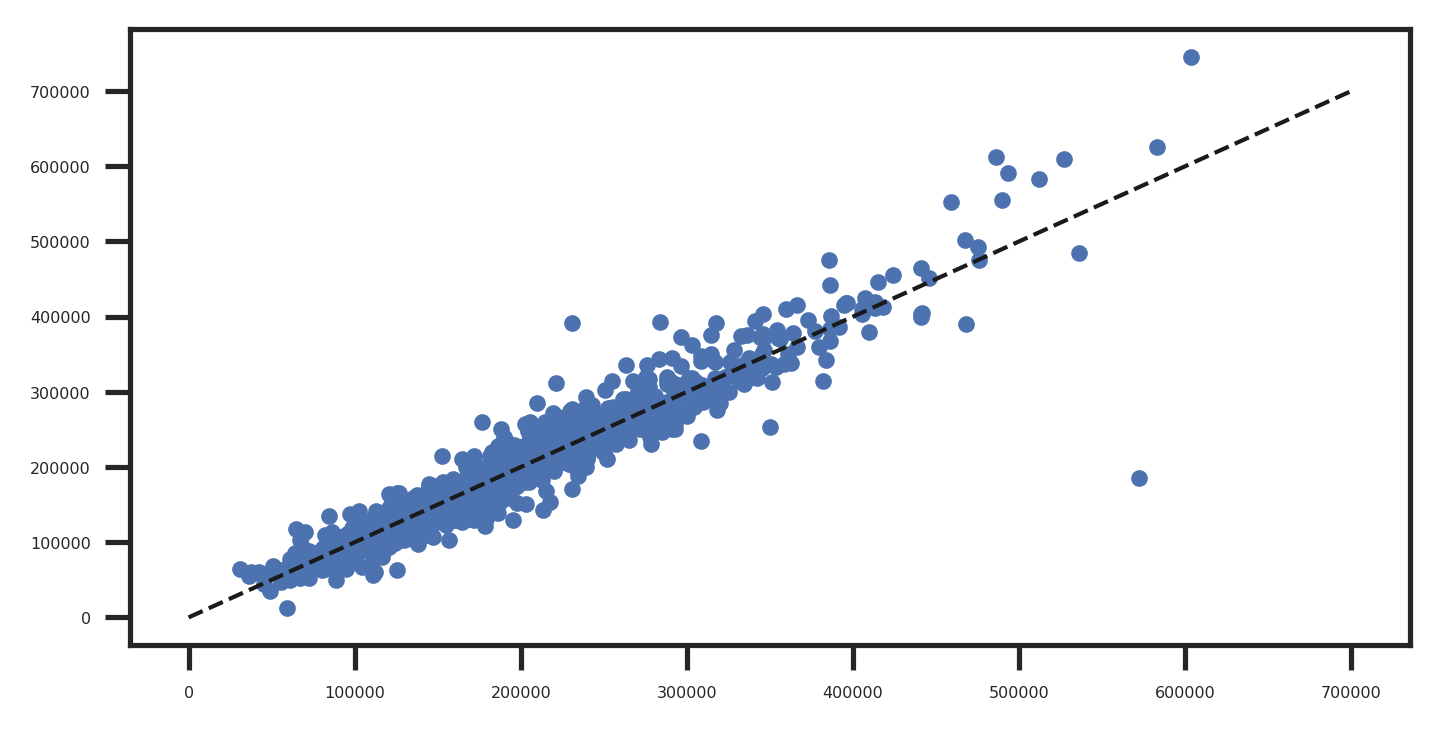

In [ ]:
fs=(cm2inch(12,6))
fig, ax=plt.subplots(figsize=fs, dpi=DPI, nrows=1, ncols=1, tight_layout=True)

#Ascissa valore previsto, in ordinata valore reale
ax.scatter(y_test_hat, y_test_c, marker = '.') 
ax.plot([0, 7e5], [0, 7e5], color='k', linestyle='--', linewidth=1)  
plt.show()
fig.savefig('8.1.png')